In [1]:
import os, sys
current_dir = os.path.dirname(os.path.abspath("../module.py"))
sys.path.append(current_dir)
from module import *

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [3]:
autoencoder = Sequential()
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

In [4]:
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 38s 78ms/step - loss: 0.1985 - val_loss: 0.1340
Epoch 2/50
469/469 [==============================] - 48s 103ms/step - loss: 0.1242 - val_loss: 0.1142
Epoch 3/50
469/469 [==============================] - 48s 103ms/step - loss: 0.1107 - val_loss: 0.1058
Epoch 4/50
469/469 [==============================] - 46s 97ms/step - loss: 0.1044 - val_loss: 0.1008
Epoch 5/50
469/469 [==============================] - 46s 98ms/step - loss: 0.1003 - val_loss: 0.0973
Epoch 6/50
469/469 [==============================] - 41s 86ms/step - loss: 0.0973 - val_loss: 0.0950
Epoch 7/50
469/469 [==============================] - 42s 89ms/step - loss: 0.0952 - val_loss: 0.0934
Epoch 8/50
469/469 [==============================] - 47s 100ms/step - loss: 0.0937 - val_loss: 0.0918
Epoch 9/50
469/469 [==============================] - 42s 90ms/step - loss: 0.0924 - val_loss: 0.0908
Epoch 10/50
469/469 [==============================] - 41s 88ms/step - loss: 0.

313/313 [==============================] - 2s 7ms/step


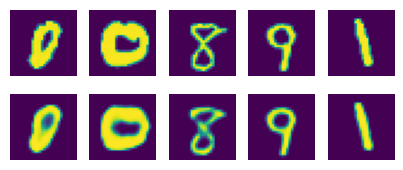

In [7]:
random_test = np.random.randint(X_test.shape[0], size=5)

# 테스트할 이미지를 랜덤으로 호출합
ae_imgs = autoencoder.predict(X_test) # 앞서 만든 오토인코더 모델에 넣음

plt.figure(figsize=(7, 2)) # 출력 이미지의 크기를 정함

for i, image_idx in enumerate(random_test):
    # 랜덤으로 뽑은 이미지를 차례로 나열함
    ax = plt.subplot(2, 7, i+1)
    # 테스트할 이미지를 먼저 그대로 보여 줌
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)
    # 오토인코딩 결과를 다음 열에 입력함
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')
plt.show()